In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_train=pd.read_csv("/home/ing/Bureau/tp_AP/titanic_train.csv")
df_test=pd.read_csv("/home/ing/Bureau/tp_AP/titanic_test.csv")
df_train.drop(columns=['Name','FullName','Embarked','Ticket'],inplace=True)
df_test.drop(columns=['Name','FullName','Embarked','Ticket'],inplace=True)
len(df_train)

593

Text(0.5, 1.0, 'Age histogram')

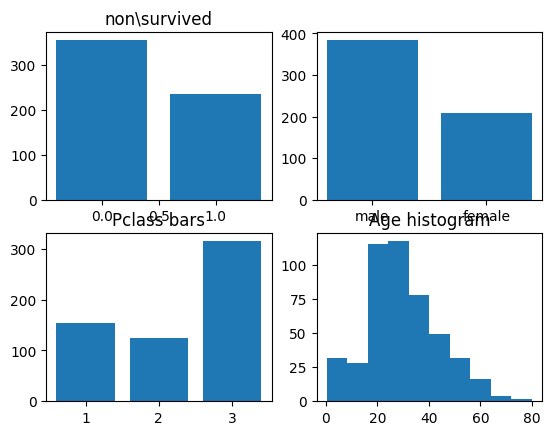

In [19]:
fig,ax=plt.subplots(2,2)

ax[0,0].bar([0,1],df_train.value_counts(['Survived']))
ax[0,0].set_title('non\survived')

ax[0,1].bar(['male','female'],df_train.value_counts(['Sex']))

ax[1,0].bar([3,1,2],df_train.value_counts(['Pclass']))
ax[1,0].set_title('Pclass bars')

ax[1,1].hist(df_train['Age'])
ax[1,1].set_title('Age histogram')

In [17]:
c_s=pd.crosstab(df_train['Pclass'],df_train['Survived'])
c_s=c_s.to_numpy()
pclass=[1,2,3]
surv=c_s[:,1]
nsurv=c_s[:,0]
s_s=pd.crosstab(df_train['Sex'],df_train['Survived'])
s_s=s_s.to_numpy()
sex=['female','male']
s_surv=s_s[:,1]
s_nsurv=s_s[:,0]

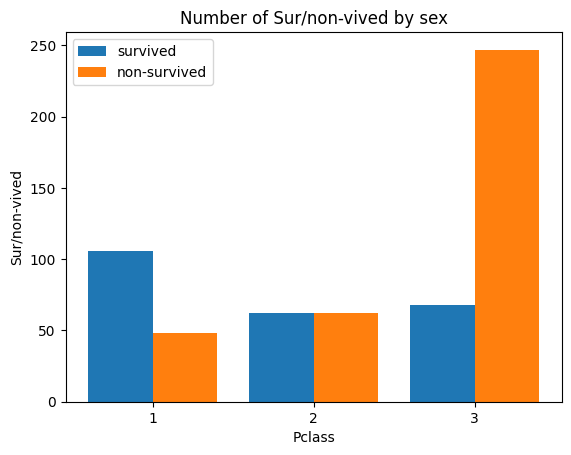

In [18]:
xclass=np.arange(len(pclass))

plt.bar(xclass - 0.2, surv, 0.4, label = 'survived')
plt.bar(xclass + 0.2, nsurv, 0.4, label = 'non-survived')
  
plt.xticks(xclass, pclass)
plt.xlabel("Pclass")
plt.ylabel("Sur/non-vived")
plt.title("Number of Sur/non-vived by sex")
plt.legend()
plt.show()

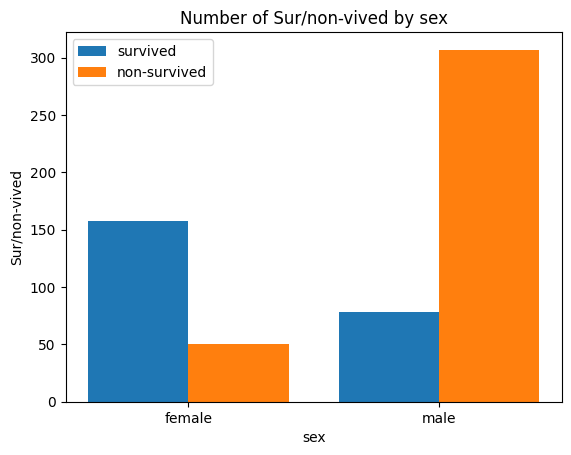

In [20]:
xsex=np.arange(len(sex))

plt.bar(xsex - 0.2, s_surv, 0.4, label = 'survived')
plt.bar(xsex + 0.2, s_nsurv, 0.4, label = 'non-survived')
  
plt.xticks(xsex, sex)
plt.xlabel("sex")
plt.ylabel("Sur/non-vived")
plt.title("Number of Sur/non-vived by sex")
plt.legend()
plt.show()

In [30]:
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin          75.885329
Child           0.000000
dtype: float64

There are no missings values for the attributes PassengerId, Survived,pclass,Sex,SibSp,Parch but we have 20 percent missing values for the Age of passengers and 75.8 percent missing values for the cabin of passengers. So we can delete this last one. 

**Number and percentage of deads and survived**

In [21]:
n_ds=df_train.value_counts(['Survived'])
p_ds=n_ds*(100/len(df_train))
print(n_ds)
print(p_ds)

Survived
0           357
1           236
dtype: int64
Survived
0           60.202361
1           39.797639
dtype: float64


**B- Women and children first !**

women have more chances to survive than men

In [3]:
# Add a new column Child
#
df_train['Age']=df_train['Age'].astype(float)

child=[]
count=0
for i,a in df_train['Age'].items():
    count+=1
    if a<=18:
        child.append("child")
    
    #if (a!=np.nan and a>18):
        #child.append("adult")
   # else:
        #child.append(np.nan)
    #print(len(child))

count

df_train['Child']=[np.nan for i in range(593)]
df_train.loc[df_train['Age']<=18,'Child']=child

df_train.loc[df_train['Age']>18,'Child']='adult'



In [23]:

pd.crosstab(df_train['Child'],df_train['Survived'])

Survived,0,1
Child,,
adult,229,155
child,41,48


There are 20 percent of Age are missing values. So the survival rates depending on Age is biaised. we're going to replce the missing values by mean

In [4]:
mean_value=df_train['Age'].mean()
df_train=df_train.fillna({'Age':mean_value})
df_train['Age']
df_train['Child']=df_train['Child'].fillna('adult')
df_train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Child
0,299,1,1,male,30.122283,0,0,30.5000,C106,adult
1,300,1,1,female,50.000000,0,1,247.5208,B58 B60,adult
2,301,1,3,female,30.122283,0,0,7.7500,NaN,adult
3,302,1,3,male,30.122283,2,0,23.2500,NaN,adult
4,303,0,3,male,19.000000,0,0,0.0000,NaN,adult
...,...,...,...,...,...,...,...,...,...,...
588,887,0,2,male,27.000000,0,0,13.0000,NaN,adult
589,888,1,1,female,19.000000,0,0,30.0000,B42,adult
590,889,0,3,female,30.122283,1,2,23.4500,NaN,adult
591,890,1,1,male,26.000000,0,0,30.0000,C148,adult


In [15]:

pd.crosstab(df_train['Child'],df_train['Survived'])

Survived,0,1
Child,,
adult,316,188
child,41,48


In [5]:
sex_age=pd.crosstab([df_train['Sex'],df_train['Child']],df_train['Survived'])
sex_age=sex_age.to_numpy()
sex_age.shape

(4, 2)

In [17]:
pd.crosstab([df_train['Sex'],df_train['Child']],df_train['Survived'])

Survived        0    1
Sex    Child          
female adult   39  126
       child   11   32
male   adult  277   62
       child   30   16

This policy of 'Women and children first !' allowed to save almost 76 percent of women and almost 54 percent of children. We can conclude that it was effiscient.

In [53]:
df_train['Child']
df_test['Age'].isna().sum() * 100 / len(df_test)

0.0

In [6]:
df_test['Child']=[np.nan for _ in range(len(df_test))]

df_test.loc[df_test['Age']<=18,'Child']='child'

df_test.loc[df_test['Age']>18,'Child']='adult'

chd_trn,uni_chd=pd.factorize(df_train['Child'])

sex_trn,uni_sex=pd.factorize(df_train['Sex'])
uni_sex

Index(['male', 'female'], dtype='object')

In [7]:
df_test['Age']=df_test['Age'].fillna(df_test['Age'].mean())

chd_tst,uni_chd=pd.factorize(df_test['Child'])

sex_tst,sex_uni=pd.factorize(df_test['Sex'])

X1_train=np.array([chd_trn,sex_trn]).reshape((593,2))

X1_train
uni_sex


Index(['male', 'female'], dtype='object')

In [47]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
X1_train=np.array([chd_trn,sex_trn]).reshape((593,2))

X1_test=np.array([chd_tst,sex_tst]).reshape((chd_tst.shape[0],2))

y_train=df_train['Survived'].to_numpy()

y_test=df_test['Survived'].to_numpy()

gnb.fit(X1_train,y_train)

gnb.score(X1_train,y_train)

gnb.score(X1_test,y_test)

y=gnb.predict(X1_test)
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Child,Fare2
0,299,1,1,male,30.122283,0,0,30.5000,C106,adult,30+
1,300,1,1,female,50.000000,0,1,247.5208,B58 B60,adult,30+
2,301,1,3,female,30.122283,0,0,7.7500,NaN,adult,<10
3,302,1,3,male,30.122283,2,0,23.2500,NaN,adult,20-30
4,303,0,3,male,19.000000,0,0,0.0000,NaN,adult,<10
...,...,...,...,...,...,...,...,...,...,...,...
588,887,0,2,male,27.000000,0,0,13.0000,NaN,adult,10-20
589,888,1,1,female,19.000000,0,0,30.0000,B42,adult,20-30
590,889,0,3,female,30.122283,1,2,23.4500,NaN,adult,20-30
591,890,1,1,male,26.000000,0,0,30.0000,C148,adult,20-30


In [43]:
#train_set factorizing
pclass_train=pd.factorize(df_train['Pclass'])[0]


fare=[]
for i,a in df_train['Fare'].items():
    if a<=10:
        fare.append('<10')
    if (a<=20 and a>10):
        fare.append('10-20')
    if (a<=30 and a>20):
        fare.append('20-30')
    if (a>30):
        fare.append('30+')
    
df_train['Fare2']=fare
fare_train=pd.factorize(df_train['Fare2'])[0]

#test_set factorizing

pclass_test=pd.factorize(df_test['Pclass'])[0]

fare=[]
for i,a in df_test['Fare'].items():
    if a<=10:
        fare.append('<10')
    if (a<=20 and a>10):
        fare.append('10-20')
    if (a<=30 and a>20):
        fare.append('20-30')
    if (a>30):
        fare.append('30+')
    
df_test['Fare2']=fare
fare_test=pd.factorize(df_test['Fare2'])[0]

fare_test


array([0, 1, 0, 1, 0, 0, 1, 2, 3, 1, 3, 2, 0, 1, 0, 3, 2, 3, 3, 0, 2, 3,
       0, 1, 2, 1, 0, 1, 0, 0, 2, 1, 0, 3, 1, 1, 0, 0, 3, 3, 0, 2, 0, 1,
       0, 0, 3, 0, 2, 3, 1, 0, 1, 2, 1, 1, 3, 0, 2, 1, 0, 1, 1, 2, 2, 3,
       3, 0, 0, 0, 3, 1, 1, 3, 1, 0, 0, 0, 2, 3, 0, 0, 0, 1, 3, 3, 1, 0,
       1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       1, 3, 0, 0, 3, 0, 0, 2, 1, 1, 1, 0, 1, 3, 1, 3, 0, 0, 2, 0, 0, 0,
       3, 2, 3, 3, 2, 1, 0, 1, 3, 0, 3, 0, 3, 1, 0, 1, 2, 3, 3, 1, 0, 3,
       0, 1, 0, 0, 0, 1, 3, 3, 0, 0, 1, 2, 1, 2, 2, 1, 1, 2, 3, 0, 1, 0,
       2, 2, 3, 0, 1, 3, 1, 1, 2, 1, 3, 2, 3, 0, 3, 3, 0, 2, 2, 1, 0, 0,
       0, 3, 0, 1, 0, 0, 0, 3, 3, 3, 0, 1, 0, 2, 0, 3, 0, 1, 0, 2, 1, 3,
       0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 1, 0, 3, 1, 3, 0, 2, 2, 3, 3, 3, 3,
       3, 0, 0, 1, 0, 3, 1, 2, 0, 3, 2, 3, 2, 3, 1, 1, 1, 2, 0, 1, 1, 0,
       0, 3, 1, 0, 1, 1, 1, 0, 3, 2, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0,
       0, 0, 3, 0, 1, 1, 3, 0, 0, 2, 0, 1])

The two variables Pclass and Fare2 are very dependents because the price of the ticket depends on the class in which we travel 

In [45]:
pd.crosstab(df_train['Fare2'],df_train['Survived'])
pclass_train

array([0, 0, 1, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 0,
       1, 1, 2, 2, 1, 0, 1, 2, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2,
       1, 2, 1, 2, 0, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 0, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2,
       1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1,
       2, 1, 0, 1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 2, 0,
       1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 1, 2, 1, 1,

In [52]:
from sklearn.naive_bayes import CategoricalNB
cnb=CategoricalNB()

X2_train=np.array([pclass_train,fare_train]).reshape((len(pclass_train),2))
X2_test=np.array([pclass_test,fare_test]).reshape((len(pclass_test),2))

cnb.fit(X2_train,y_train)
cnb.score(X2_train,y_train)
cnb.score(X2_test,y_test)


0.6409395973154363

The results are the same: not very good because they are both categorical data.